In [1]:
# import pandas, geopandas, numpy, matplotlib
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import csv file from local
cbirds = pd.read_csv('/Users/michaeltang/Downloads/GISC412_project_repo/Canterbury_birds/final_code/birds_canterbury.csv')


In [4]:
cbirds.info

<bound method DataFrame.info of                                GLOBAL UNIQUE IDENTIFIER LAST EDITED DATE  \
0       URN:CornellLabOfOrnithology:EBIRD:OBS1604156753       2023/01/11   
1       URN:CornellLabOfOrnithology:EBIRD:OBS1604300891       2023/01/11   
2       URN:CornellLabOfOrnithology:EBIRD:OBS1622102585       2023/02/03   
3       URN:CornellLabOfOrnithology:EBIRD:OBS1611155699       2023/12/11   
4       URN:CornellLabOfOrnithology:EBIRD:OBS1609319533       2023/01/18   
...                                                 ...              ...   
194939  URN:CornellLabOfOrnithology:EBIRD:OBS1892829220       2023/12/08   
194940  URN:CornellLabOfOrnithology:EBIRD:OBS1889833277       2024/04/18   
194941  URN:CornellLabOfOrnithology:EBIRD:OBS1892819952       2023/12/08   
194942  URN:CornellLabOfOrnithology:EBIRD:OBS1899120072       2023/12/16   
194943  URN:CornellLabOfOrnithology:EBIRD:OBS1890521240       2024/04/18   

        TAXONOMIC ORDER CATEGORY  TAXON CONCEPT ID     

In [5]:
cbirds.columns

Index(['GLOBAL UNIQUE IDENTIFIER', 'LAST EDITED DATE', 'TAXONOMIC ORDER',
       'CATEGORY', 'TAXON CONCEPT ID', 'COMMON NAME', 'SCIENTIFIC NAME',
       'SUBSPECIES COMMON NAME', 'SUBSPECIES SCIENTIFIC NAME', 'EXOTIC CODE',
       'OBSERVATION COUNT', 'BREEDING CODE', 'BREEDING CATEGORY',
       'BEHAVIOR CODE', 'AGE/SEX', 'COUNTRY', 'COUNTRY CODE', 'STATE',
       'STATE CODE', 'COUNTY', 'COUNTY CODE', 'IBA CODE', 'BCR CODE',
       'USFWS CODE', 'ATLAS BLOCK', 'LOCALITY', 'LOCALITY ID', 'LOCALITY TYPE',
       'LATITUDE', 'LONGITUDE', 'OBSERVATION DATE',
       'TIME OBSERVATIONS STARTED', 'OBSERVER ID', 'SAMPLING EVENT IDENTIFIER',
       'PROTOCOL TYPE', 'PROTOCOL CODE', 'PROJECT CODE', 'DURATION MINUTES',
       'EFFORT DISTANCE KM', 'EFFORT AREA HA', 'NUMBER OBSERVERS',
       'ALL SPECIES REPORTED', 'GROUP IDENTIFIER', 'HAS MEDIA', 'APPROVED',
       'REVIEWED', 'REASON', 'TRIP COMMENTS', 'SPECIES COMMENTS'],
      dtype='object')

In [6]:
cbirds['SUBSPECIES SCIENTIFIC NAME'].value_counts()

SUBSPECIES SCIENTIFIC NAME
Columba livia (Feral Pigeon)                  2776
Chroicocephalus novaehollandiae scopulinus    1520
Anas platyrhynchos (Domestic type)             320
Petroica macrocephala [macrocephala Group]     307
Phalacrocorax carbo novaehollandiae            202
Cairina moschata (Domestic type)               156
Anser anser (Domestic type)                    114
Gallus gallus (Domestic type)                   26
Ardea alba modesta                              12
Diomedea antipodensis gibsoni                   11
Todiramphus sanctus vagans                       8
Thalassarche melanophris melanophris             7
Thalassarche cauta steadi                        7
Vanellus miles novaehollandiae                   3
Daption capense australe                         3
Carduelis carduelis [carduelis Group]            3
Meleagris gallopavo (Domestic type)              1
Limosa lapponica [baueri Group]                  1
Leucocarbo chalconotus chalconotus               1
Diom

In [7]:
cbirds.shape

(194944, 49)

In [8]:
cbirds['COMMON NAME'].value_counts()

COMMON NAME
Eurasian Blackbird          10148
House Sparrow                9650
European Starling            8393
Kelp Gull                    7835
Common Chaffinch             7761
                            ...  
Gray-backed Storm-Petrel        1
Flesh-footed Shearwater         1
Fairy Prion                     1
Lady Amherst's Pheasant         1
grebe sp.                       1
Name: count, Length: 195, dtype: int64

<Axes: >

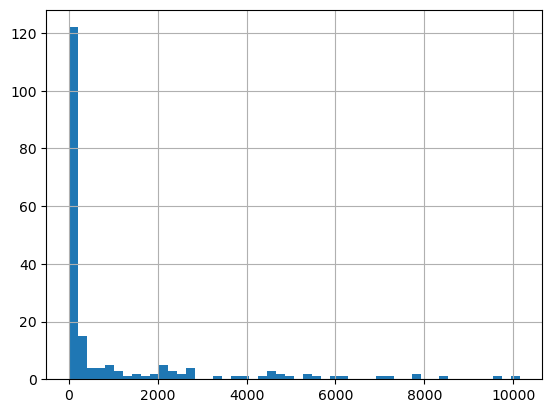

In [9]:
#
cbirds['COMMON NAME'].value_counts().hist(bins=50)

In [ ]:
#cbirds['COMMON NAME'].unique()

<Axes: xlabel='COMMON NAME'>

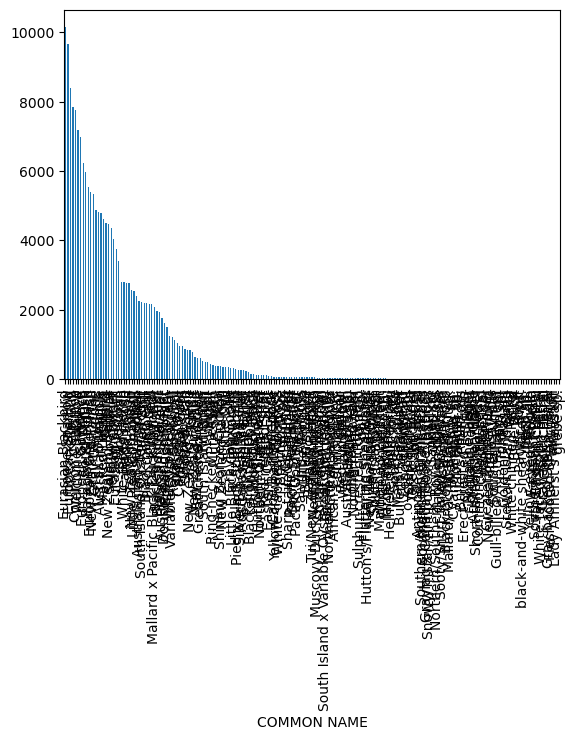

In [10]:
# plot the number of distribution of bird species
cbirds['COMMON NAME'].value_counts().plot(kind='bar')

In [ ]:
# fileter out the bird species < 1
#cbirds_filtered = cbirds[cbirds['COMMON NAME'].value_counts() > 1]

In [11]:
# fileter out the bird species < 1
cbirds_filtered = cbirds.groupby('COMMON NAME').filter(lambda x: len(x) > 2)

In [12]:
cbirds_filtered['COMMON NAME'].value_counts()

COMMON NAME
Eurasian Blackbird             10148
House Sparrow                   9650
European Starling               8393
Kelp Gull                       7835
Common Chaffinch                7761
                               ...  
tern sp.                           3
Gull-billed/Australian Tern        3
Stewart Island Shag                3
Golden Pheasant                    3
Turdus sp.                         3
Name: count, Length: 175, dtype: int64

In [13]:
cbirds_filtered['COMMON NAME'].unique()

array(['albatross sp.', 'Australasian Gannet', 'Australian Magpie',
       'New Zealand Pipit', 'Black-browed Albatross', 'Black-billed Gull',
       'Black-fronted Tern', 'Black Swan', "Buller's Albatross",
       "Buller's Shearwater", 'California Quail', 'Canada Goose',
       'Cape Petrel', 'Caspian Tern', 'Cirl Bunting', 'Common Chaffinch',
       'Double-banded Plover', 'Dunnock', 'Eurasian Blackbird',
       'European Goldfinch', 'European Greenfinch', 'European Starling',
       'Fluttering Shearwater', 'Great Cormorant', 'Gray Teal',
       'Gray Gerygone', 'House Sparrow', "Hutton's Shearwater",
       'Kelp Gull', 'Little Pied Cormorant', 'Little Owl', 'Mallard',
       'Masked Lapwing', 'New Zealand Bellbird', 'New Zealand Falcon',
       'New Zealand Fantail', 'New Zealand Pigeon', 'South Island Robin',
       'New Zealand Scaup', 'Northern Giant-Petrel', 'Pacific Reef-Heron',
       'Paradise Shelduck', 'passerine sp.', 'Pied Cormorant',
       'Pied Stilt', 'Pipipi', 'Pr

In [ ]:
# check the unique of bcr code
#cbirds_filtered['BCR CODE']

In [14]:
cbirds_filtered.columns

Index(['GLOBAL UNIQUE IDENTIFIER', 'LAST EDITED DATE', 'TAXONOMIC ORDER',
       'CATEGORY', 'TAXON CONCEPT ID', 'COMMON NAME', 'SCIENTIFIC NAME',
       'SUBSPECIES COMMON NAME', 'SUBSPECIES SCIENTIFIC NAME', 'EXOTIC CODE',
       'OBSERVATION COUNT', 'BREEDING CODE', 'BREEDING CATEGORY',
       'BEHAVIOR CODE', 'AGE/SEX', 'COUNTRY', 'COUNTRY CODE', 'STATE',
       'STATE CODE', 'COUNTY', 'COUNTY CODE', 'IBA CODE', 'BCR CODE',
       'USFWS CODE', 'ATLAS BLOCK', 'LOCALITY', 'LOCALITY ID', 'LOCALITY TYPE',
       'LATITUDE', 'LONGITUDE', 'OBSERVATION DATE',
       'TIME OBSERVATIONS STARTED', 'OBSERVER ID', 'SAMPLING EVENT IDENTIFIER',
       'PROTOCOL TYPE', 'PROTOCOL CODE', 'PROJECT CODE', 'DURATION MINUTES',
       'EFFORT DISTANCE KM', 'EFFORT AREA HA', 'NUMBER OBSERVERS',
       'ALL SPECIES REPORTED', 'GROUP IDENTIFIER', 'HAS MEDIA', 'APPROVED',
       'REVIEWED', 'REASON', 'TRIP COMMENTS', 'SPECIES COMMENTS'],
      dtype='object')

In [16]:
# convert 'last edited date' into date formate
cbirds_filtered['LAST EDITED DATE'] = pd.to_datetime(cbirds_filtered['LAST EDITED DATE'])

In [17]:
# create month column from 'last edited date'
cbirds_filtered['Last Edited Month'] = cbirds_filtered['LAST EDITED DATE'].dt.month

In [19]:
cbirds_filtered.columns

Index(['GLOBAL UNIQUE IDENTIFIER', 'LAST EDITED DATE', 'TAXONOMIC ORDER',
       'CATEGORY', 'TAXON CONCEPT ID', 'COMMON NAME', 'SCIENTIFIC NAME',
       'SUBSPECIES COMMON NAME', 'SUBSPECIES SCIENTIFIC NAME', 'EXOTIC CODE',
       'OBSERVATION COUNT', 'BREEDING CODE', 'BREEDING CATEGORY',
       'BEHAVIOR CODE', 'AGE/SEX', 'COUNTRY', 'COUNTRY CODE', 'STATE',
       'STATE CODE', 'COUNTY', 'COUNTY CODE', 'IBA CODE', 'BCR CODE',
       'USFWS CODE', 'ATLAS BLOCK', 'LOCALITY', 'LOCALITY ID', 'LOCALITY TYPE',
       'LATITUDE', 'LONGITUDE', 'OBSERVATION DATE',
       'TIME OBSERVATIONS STARTED', 'OBSERVER ID', 'SAMPLING EVENT IDENTIFIER',
       'PROTOCOL TYPE', 'PROTOCOL CODE', 'PROJECT CODE', 'DURATION MINUTES',
       'EFFORT DISTANCE KM', 'EFFORT AREA HA', 'NUMBER OBSERVERS',
       'ALL SPECIES REPORTED', 'GROUP IDENTIFIER', 'HAS MEDIA', 'APPROVED',
       'REVIEWED', 'REASON', 'TRIP COMMENTS', 'SPECIES COMMENTS',
       'Last Edited Month'],
      dtype='object')

In [20]:
cbirds_filtered['Last Edited Month'].unique()

array([ 1, 12, 10,  3,  9,  2,  7, 11,  5,  8,  4,  6], dtype=int32)

In [21]:
cbirds_filtered['OBSERVATION DATE'] = pd.to_datetime(cbirds_filtered['OBSERVATION DATE'])

In [22]:
cbirds_filtered['obs_month'] = cbirds_filtered['OBSERVATION DATE'].dt.month

In [23]:
cbirds_filtered.obs_month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [24]:
cbirds_filtered['TAXON CONCEPT ID'].value_counts()

TAXON CONCEPT ID
avibase-88BB4F2A    10148
avibase-240E3390     9650
avibase-94A44032     8393
avibase-E6536E4E     7835
avibase-6364E4A5     7761
                    ...  
avibase-EDEC5EC5        1
avibase-4C26D29D        1
avibase-2F2A913A        1
avibase-47AF130E        1
avibase-96706851        1
Name: count, Length: 196, dtype: int64

In [25]:
cbirds_filtered['EXOTIC CODE'].value_counts()

EXOTIC CODE
N    90447
X      645
P      333
Name: count, dtype: int64

In [26]:
cbirds_filtered['OBSERVATION COUNT'].value_counts()

OBSERVATION COUNT
1       56858
2       42594
3       18839
4       14860
5        9714
        ...  
671         1
810         1
470         1
227         1
1400        1
Name: count, Length: 386, dtype: int64

In [27]:
cbirds_filtered['BCR CODE'].unique()

array([nan])

In [28]:
# drop unuse cols
cbirds_filtered.drop(['GLOBAL UNIQUE IDENTIFIER', 'SUBSPECIES SCIENTIFIC NAME','BCR CODE','USFWS CODE','TAXON CONCEPT ID','AGE/SEX','COUNTRY','COUNTRY CODE','STATE','OBSERVER ID','SAMPLING EVENT IDENTIFIER','PROTOCOL TYPE','PROTOCOL CODE','PROJECT CODE','DURATION MINUTES','EFFORT DISTANCE KM','EFFORT AREA HA','NUMBER OBSERVERS','GROUP IDENTIFIER','HAS MEDIA','REVIEWED','REASON','TRIP COMMENTS','SPECIES COMMENTS','SUBSPECIES COMMON NAME','ALL SPECIES REPORTED'], axis=1, inplace=True)

In [29]:
cbirds_filtered.head()

,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,COMMON NAME,SCIENTIFIC NAME,EXOTIC CODE,OBSERVATION COUNT,BREEDING CODE,BREEDING CATEGORY,BEHAVIOR CODE,...,LOCALITY,LOCALITY ID,LOCALITY TYPE,LATITUDE,LONGITUDE,OBSERVATION DATE,TIME OBSERVATIONS STARTED,APPROVED,Last Edited Month,obs_month
0,2023-01-11,6851,spuh,albatross sp.,Diomedeidae sp.,NaN,1,NaN,NaN,NaN,...,"Hikurangi Marine Reserve, Kaikōura NZ-Canterbu...",L22166918,P,-42.458124,173.554744,2023-01-12,11:41:00,1,1,1
1,2023-01-11,6851,spuh,albatross sp.,Diomedeidae sp.,NaN,4,NaN,NaN,NaN,...,"North of Clarence River Mouth, Kaikōura NZ-Can...",L22168688,P,-42.171416,173.932336,2023-01-12,13:16:00,1,1,1
3,2023-12-11,7167,species,Australasian Gannet,Morus serrator,NaN,1,NaN,NaN,NaN,...,Kaikoura--town waterfront,L1249759,H,-42.402038,173.682518,2023-01-21,11:59:00,1,12,1
4,2023-01-18,7167,species,Australasian Gannet,Morus serrator,NaN,1,NaN,NaN,NaN,...,"1200 Alpine Pacific Touring Route, Peketā, Can...",L22249885,P,-42.451887,173.568536,2023-01-18,11:02:00,1,1,1
5,2023-10-17,7167,species,Australasian Gannet,Morus serrator,NaN,2,NaN,NaN,NaN,...,Kaikoura South Coast--Oaro River Mouth,L12602431,H,-42.513964,173.507146,2023-01-15,12:05:00,1,10,1


In [ ]:
#

In [ ]:
# further drop
#cbirds_filtered = cbirds_filtered.drop(['SUBSPECIES COMMON NAME','ATLAS BLOCK'], axis=1)

In [30]:
cbirds_filtered.columns

Index(['LAST EDITED DATE', 'TAXONOMIC ORDER', 'CATEGORY', 'COMMON NAME',
       'SCIENTIFIC NAME', 'EXOTIC CODE', 'OBSERVATION COUNT', 'BREEDING CODE',
       'BREEDING CATEGORY', 'BEHAVIOR CODE', 'STATE CODE', 'COUNTY',
       'COUNTY CODE', 'IBA CODE', 'ATLAS BLOCK', 'LOCALITY', 'LOCALITY ID',
       'LOCALITY TYPE', 'LATITUDE', 'LONGITUDE', 'OBSERVATION DATE',
       'TIME OBSERVATIONS STARTED', 'APPROVED', 'Last Edited Month',
       'obs_month'],
      dtype='object')

In [31]:
cbirds_filtered.head()

,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,COMMON NAME,SCIENTIFIC NAME,EXOTIC CODE,OBSERVATION COUNT,BREEDING CODE,BREEDING CATEGORY,BEHAVIOR CODE,...,LOCALITY,LOCALITY ID,LOCALITY TYPE,LATITUDE,LONGITUDE,OBSERVATION DATE,TIME OBSERVATIONS STARTED,APPROVED,Last Edited Month,obs_month
0,2023-01-11,6851,spuh,albatross sp.,Diomedeidae sp.,NaN,1,NaN,NaN,NaN,...,"Hikurangi Marine Reserve, Kaikōura NZ-Canterbu...",L22166918,P,-42.458124,173.554744,2023-01-12,11:41:00,1,1,1
1,2023-01-11,6851,spuh,albatross sp.,Diomedeidae sp.,NaN,4,NaN,NaN,NaN,...,"North of Clarence River Mouth, Kaikōura NZ-Can...",L22168688,P,-42.171416,173.932336,2023-01-12,13:16:00,1,1,1
3,2023-12-11,7167,species,Australasian Gannet,Morus serrator,NaN,1,NaN,NaN,NaN,...,Kaikoura--town waterfront,L1249759,H,-42.402038,173.682518,2023-01-21,11:59:00,1,12,1
4,2023-01-18,7167,species,Australasian Gannet,Morus serrator,NaN,1,NaN,NaN,NaN,...,"1200 Alpine Pacific Touring Route, Peketā, Can...",L22249885,P,-42.451887,173.568536,2023-01-18,11:02:00,1,1,1
5,2023-10-17,7167,species,Australasian Gannet,Morus serrator,NaN,2,NaN,NaN,NaN,...,Kaikoura South Coast--Oaro River Mouth,L12602431,H,-42.513964,173.507146,2023-01-15,12:05:00,1,10,1


In [32]:
cbirds_filtered['COMMON NAME'].unique()

array(['albatross sp.', 'Australasian Gannet', 'Australian Magpie',
       'New Zealand Pipit', 'Black-browed Albatross', 'Black-billed Gull',
       'Black-fronted Tern', 'Black Swan', "Buller's Albatross",
       "Buller's Shearwater", 'California Quail', 'Canada Goose',
       'Cape Petrel', 'Caspian Tern', 'Cirl Bunting', 'Common Chaffinch',
       'Double-banded Plover', 'Dunnock', 'Eurasian Blackbird',
       'European Goldfinch', 'European Greenfinch', 'European Starling',
       'Fluttering Shearwater', 'Great Cormorant', 'Gray Teal',
       'Gray Gerygone', 'House Sparrow', "Hutton's Shearwater",
       'Kelp Gull', 'Little Pied Cormorant', 'Little Owl', 'Mallard',
       'Masked Lapwing', 'New Zealand Bellbird', 'New Zealand Falcon',
       'New Zealand Fantail', 'New Zealand Pigeon', 'South Island Robin',
       'New Zealand Scaup', 'Northern Giant-Petrel', 'Pacific Reef-Heron',
       'Paradise Shelduck', 'passerine sp.', 'Pied Cormorant',
       'Pied Stilt', 'Pipipi', 'Pr

In [33]:
#extract the migration birds type form common_name
migration_birds_list = ['Bar-tailed Godwit','Pacific Golden-Plover','Ruddy Turnstone','Sharp-tailed Sandpiper','Red-necked Stint','Little Tern','white-winged tern','Southern/Northern Giant-Petrel','Short-tailed Shearwater','Eastern Cattle Egret']

In [34]:
migration_birds = cbirds_filtered[cbirds_filtered['COMMON NAME'].isin(migration_birds_list)]

In [35]:
migration_birds.shape

(1129, 25)

In [36]:
migration_birds['COMMON NAME'].value_counts()

COMMON NAME
Bar-tailed Godwit                 612
Ruddy Turnstone                   130
Red-necked Stint                  108
Eastern Cattle Egret              103
Sharp-tailed Sandpiper             67
Pacific Golden-Plover              59
Little Tern                        31
Southern/Northern Giant-Petrel     14
Short-tailed Shearwater             5
Name: count, dtype: int64

In [37]:
migration_birds.head()

,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,COMMON NAME,SCIENTIFIC NAME,EXOTIC CODE,OBSERVATION COUNT,BREEDING CODE,BREEDING CATEGORY,BEHAVIOR CODE,...,LOCALITY,LOCALITY ID,LOCALITY TYPE,LATITUDE,LONGITUDE,OBSERVATION DATE,TIME OBSERVATIONS STARTED,APPROVED,Last Edited Month,obs_month
820,2023-01-10,6125,species,Ruddy Turnstone,Arenaria interpres,NaN,17,NaN,NaN,NaN,...,Kaikoura--Armers Beach,L1399210,H,-42.419497,173.706808,2023-01-09,20:33:00,1,1,1
821,2023-01-10,6125,species,Ruddy Turnstone,Arenaria interpres,NaN,17,NaN,NaN,NaN,...,Kaikoura--Armers Beach,L1399210,H,-42.419497,173.706808,2023-01-09,20:33:00,1,1,1
822,2023-01-11,6125,species,Ruddy Turnstone,Arenaria interpres,NaN,1,NaN,NaN,NaN,...,Kaikoura--Point Kean Seal Colony,L558781,H,-42.423583,173.716893,2023-01-12,12:52:00,1,1,1
4682,2023-01-12,6000,species,Bar-tailed Godwit,Limosa lapponica,NaN,10,NaN,NaN,NaN,...,Ashley River Estuary,L523080,H,-43.276705,172.718811,2023-01-12,12:05:00,1,1,1
4683,2022-12-31,6000,species,Bar-tailed Godwit,Limosa lapponica,NaN,2,NaN,NaN,NaN,...,"Ashley Rakahuri Regional Park, Waikuku Beach N...",L21993117,P,-43.282429,172.721391,2023-01-01,12:26:00,1,12,1


In [38]:
migration_birds['OBSERVATION COUNT'].unique()

array(['17', '1', '10', '2', '23', '120', '37', '3', '9', 'X', '22', '7',
       '18', '12', '19', '20', '8', '25', '4', '28', '900', '60', '41',
       '55', '16', '51', '40', '34', '100', '200', '6', '33', '5', '30',
       '15', '11', '32', '45', '38', '42', '14', '24', '148', '52', '13',
       '75', '26', '21', '50', '168', '150', '35', '126', '56', '43',
       '58', '800', '64', '44', '235', '27', '140', '62', '73', '94',
       '85', '109', '127', '70', '48', '138', '31', '66', '151', '29',
       '78', '157', '46', '57', '350', '92', '67', '600', '225', '400',
       '54', '123', '63', '146', '53', '254', '192', '256', '222', '175',
       '250', '253', '243', '203', '36', '178', '160', '189', '280',
       '134', '147', '158', '179', '121', '77', '129', '130', '82', '80',
       '1200', '143'], dtype=object)

In [39]:
migration_birds['OBSERVATION COUNT'] = migration_birds['OBSERVATION COUNT'].replace('X', '1')

/var/folders/sb/fx7gkfvd347dl53rhgbljz_80000gp/T/ipykernel_36989/530686843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migration_birds['OBSERVATION COUNT'] = migration_birds['OBSERVATION COUNT'].replace('X', '1')


In [40]:
migration_birds['OBSERVATION COUNT'] = migration_birds['OBSERVATION COUNT'].astype(int)

/var/folders/sb/fx7gkfvd347dl53rhgbljz_80000gp/T/ipykernel_36989/4043691294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migration_birds['OBSERVATION COUNT'] = migration_birds['OBSERVATION COUNT'].astype(int)


In [41]:
migration_birds['OBSERVATION COUNT'].sum()

35086

In [42]:
cbirds_filtered.shape

(194916, 25)

In [43]:
# create new column assign 'M' to the rows which isin migration_birds_list otherwise to 'N'
cbirds_filtered['Migration_type'] = np.where(cbirds_filtered['COMMON NAME'].isin(migration_birds_list), 'M', 'N')

In [44]:
cbirds_filtered.head()

,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,COMMON NAME,SCIENTIFIC NAME,EXOTIC CODE,OBSERVATION COUNT,BREEDING CODE,BREEDING CATEGORY,BEHAVIOR CODE,...,LOCALITY ID,LOCALITY TYPE,LATITUDE,LONGITUDE,OBSERVATION DATE,TIME OBSERVATIONS STARTED,APPROVED,Last Edited Month,obs_month,Migration_type
0,2023-01-11,6851,spuh,albatross sp.,Diomedeidae sp.,NaN,1,NaN,NaN,NaN,...,L22166918,P,-42.458124,173.554744,2023-01-12,11:41:00,1,1,1,N
1,2023-01-11,6851,spuh,albatross sp.,Diomedeidae sp.,NaN,4,NaN,NaN,NaN,...,L22168688,P,-42.171416,173.932336,2023-01-12,13:16:00,1,1,1,N
3,2023-12-11,7167,species,Australasian Gannet,Morus serrator,NaN,1,NaN,NaN,NaN,...,L1249759,H,-42.402038,173.682518,2023-01-21,11:59:00,1,12,1,N
4,2023-01-18,7167,species,Australasian Gannet,Morus serrator,NaN,1,NaN,NaN,NaN,...,L22249885,P,-42.451887,173.568536,2023-01-18,11:02:00,1,1,1,N
5,2023-10-17,7167,species,Australasian Gannet,Morus serrator,NaN,2,NaN,NaN,NaN,...,L12602431,H,-42.513964,173.507146,2023-01-15,12:05:00,1,10,1,N


#### export the cbird_filtered as csv file 

In [ ]:
# export the cbird_filtered

# cbirds_filtered.to_csv('cbirds_filtered.csv', index=False)
#import geopandas as gpd
# export the cbirds_filtered to shaply file
cbirds_filtered.dtypes


,0
LAST EDITED DATE,object
TAXONOMIC ORDER,float64
CATEGORY,object
COMMON NAME,object
SCIENTIFIC NAME,object
EXOTIC CODE,object
OBSERVATION COUNT,object
BREEDING CODE,object
BREEDING CATEGORY,object
BEHAVIOR CODE,object


In [ ]:
# convert cbirds_filtered to geopands
cbirds_filtered = gpd.GeoDataFrame(cbirds_filtered, geometry=gpd.points_from_xy(cbirds_filtered.LONGITUDE, cbirds_filtered.LATITUDE), crs="EPSG:2193")

In [ ]:
cbirds_filtered.geometry

,geometry
0,POINT (173.555 -42.458)
1,POINT (173.932 -42.171)
3,POINT (173.683 -42.402)
4,POINT (173.569 -42.452)
5,POINT (173.507 -42.514)
...,...
75021,POINT (172.369 -43.798)
75022,POINT (172.487 -43.643)
75023,POINT (172.007 -43.518)
75024,POINT (172.228 -43.621)


In [ ]:
cbirds_filtered.to_crs(epsg=2193, inplace=True)

In [ ]:
cbirds_filtered.head()

,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,COMMON NAME,SCIENTIFIC NAME,EXOTIC CODE,OBSERVATION COUNT,BREEDING CODE,BREEDING CATEGORY,BEHAVIOR CODE,...,LOCALITY,LOCALITY ID,LOCALITY TYPE,LATITUDE,LONGITUDE,OBSERVATION DATE,TIME OBSERVATIONS STARTED,APPROVED,Migration_type,geometry
0,2023/01/11,6851.0,spuh,albatross sp.,Diomedeidae sp.,NaN,1,NaN,NaN,NaN,...,"Hikurangi Marine Reserve, Kaikōura NZ-Canterbu...",L22166918,P,-42.458124,173.554744,2023/01/12,11:41:00,1.0,N,POINT (173.555 -42.458)
1,2023/01/11,6851.0,spuh,albatross sp.,Diomedeidae sp.,NaN,4,NaN,NaN,NaN,...,"North of Clarence River Mouth, Kaikōura NZ-Can...",L22168688,P,-42.171416,173.932336,2023/01/12,13:16:00,1.0,N,POINT (173.932 -42.171)
3,2023/12/11,7167.0,species,Australasian Gannet,Morus serrator,NaN,1,NaN,NaN,NaN,...,Kaikoura--town waterfront,L1249759,H,-42.402038,173.682518,2023/01/21,11:59:00,1.0,N,POINT (173.683 -42.402)
4,2023/01/18,7167.0,species,Australasian Gannet,Morus serrator,NaN,1,NaN,NaN,NaN,...,"1200 Alpine Pacific Touring Route, Peketā, Can...",L22249885,P,-42.451887,173.568536,2023/01/18,11:02:00,1.0,N,POINT (173.569 -42.452)
5,2023/10/17,7167.0,species,Australasian Gannet,Morus serrator,NaN,2,NaN,NaN,NaN,...,Kaikoura South Coast--Oaro River Mouth,L12602431,H,-42.513964,173.507146,2023/01/15,12:05:00,1.0,N,POINT (173.507 -42.514)
